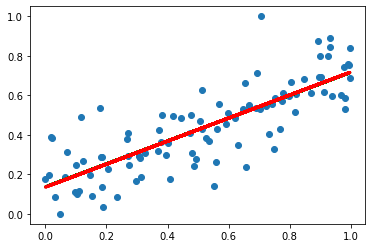

In [3]:
# implementations of linear regression using gradient descent and the normal equation
import numpy as np
from numpy import matmul
from numpy.linalg import pinv
from matplotlib import pyplot as plt


def lin_reg_grad_des(X, y, a, show_progress=False):
    m = len(X[:, 0])

    
    def get_cost(X, y, theta):                  
        return (1 / (2 * m)) * sum((matmul(X, theta) - y) ** 2)
    
    
    def get_derivative(X, y, theta, theta_index): 
        # get the partial derivative of the cost function relative to theta[theta_index]
        return (1 / m) * sum((matmul(X, theta) - y) * X[:, theta_index])


    theta = np.full(len(X[0]), 0.5)
    delta_theta = np.ones(theta.shape)
    cost = get_cost(X, y, theta)
    
    if show_progress: i = 0
    while sum(abs(delta_theta)) > 1 * 10 ** -4: # controls the needed decrease in cost to continue 
        for t in range(len(delta_theta)):
            delta_theta[t] = - a * get_derivative(X, y, theta, t)
        theta += delta_theta
        cost = get_cost(X, y, theta)
    
        if show_progress:
            i += 1
            print(i, theta, delta_theta, cost)
            plt.scatter(X[:, 1], y)
            plt.plot(X[:,1], matmul(X, theta), color='orange', linewidth='3')
            plt.draw()
            plt.pause(0.001)
            plt.clf()

    return theta


def lin_reg_norm_equ(X, y):
    theta = matmul(X.T, X)     # calculate theta using normal equation
    theta = pinv(theta)        # calculate theta using normal equation
    theta = matmul(theta, X.T) # calculate theta using normal equation
    theta = matmul(theta, y)   # calculate theta using normal equation
    
    return theta


def normalized(vector): 
    return (vector - min(vector)) / (max(vector) - min(vector))


m = 100 #number of training examples

X = np.array([np.ones((m)), np.random.rand(m)]) # for each subarray [0] is 1 and [1] is a random real number between 0 and 1
y = X[1] * np.random.randint(-5, 5) + 0.75 * np.random.randn(m) 

# X[1:] = np.array([normalized(x) for x in X[1:]]) # normalize X
y = normalized(y)                                # normalize y

X = X.T # for computation

theta_norm_equ = lin_reg_norm_equ(X, y)
theta_grad_des = lin_reg_grad_des(X, y, a=1, show_progress=False)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], matmul(X, theta_grad_des), color='g', linewidth='3')
plt.plot(X[:, 1], matmul(X, theta_norm_equ), color='r', linewidth='3')
plt.show()